In [21]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os


print("All libraries are successfully imported!")

All libraries are successfully imported!



Reading file: 3x3 Basketball.csv
                        date                          stage_code event_code  \
0  2024-07-30T18:59:05+02:00  BK3MTEAM3-------------GPA-000100--  BK3MTEAM3   
1  2024-07-30T18:59:05+02:00  BK3MTEAM3-------------GPA-000100--  BK3MTEAM3   
2  2024-07-30T19:26:55+02:00  BK3MTEAM3-------------GPA-000200--  BK3MTEAM3   
3  2024-07-30T19:26:55+02:00  BK3MTEAM3-------------GPA-000200--  BK3MTEAM3   
4  2024-07-30T22:30:21+02:00  BK3MTEAM3-------------GPA-000300--  BK3MTEAM3   

  event_name       event_stage       stage stage_status gender  \
0        Men  Men's Pool Round  Pool Round     FINISHED      M   
1        Men  Men's Pool Round  Pool Round     FINISHED      M   
2        Men  Men's Pool Round  Pool Round     FINISHED      M   
3        Men  Men's Pool Round  Pool Round     FINISHED      M   
4        Men  Men's Pool Round  Pool Round     FINISHED      M   

  discipline_name discipline_code          venue   participant_code  \
0  3x3 Basketball      

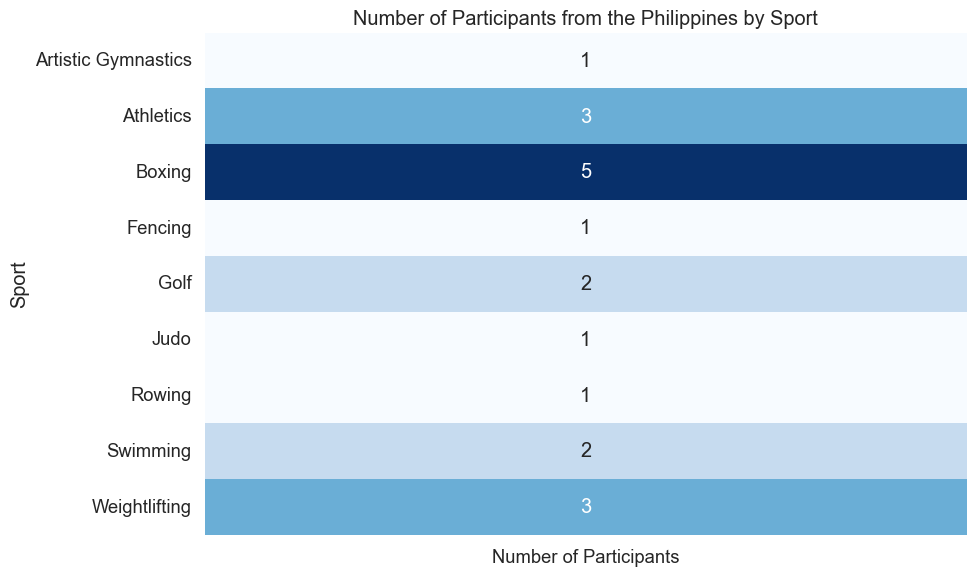

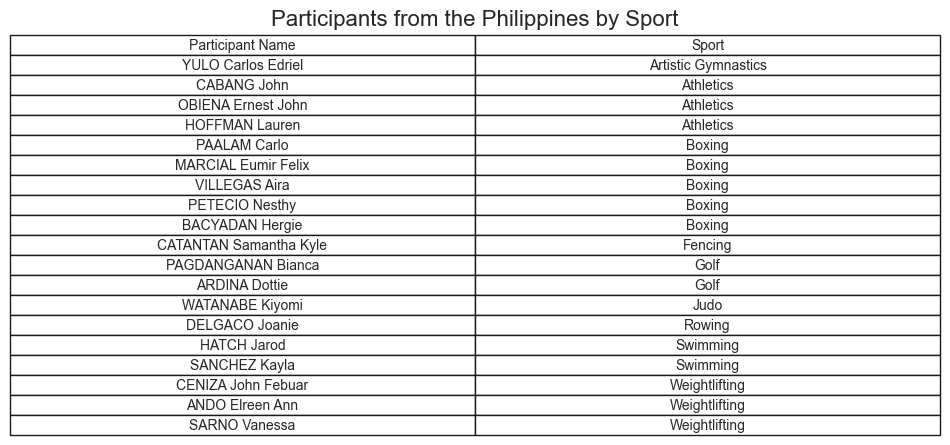

In [56]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the specified folder
results_folder = 'paris_olympics2024./paris olympics 2024 dataset updated/results/'

# Initialize an empty list to store DataFrames
dataframes = []

# Loop through each file in the results folder
for filename in os.listdir(results_folder):
    if filename.endswith('.csv'):  # Check if the file is a CSV
        file_path = os.path.join(results_folder, filename)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Standardize the column names: remove leading/trailing spaces, convert to lowercase
        df.columns = df.columns.str.strip().str.lower()

        # Print the first few rows of each file to verify the data structure
        print(f"\nReading file: {filename}")
        print(df.head())  # Display first few rows
        print("Columns:", df.columns)  # Display columns of the current file
        
        # Rename columns if necessary to maintain consistency
        column_rename_mapping = {
            'participant country': 'participant_country',  # Example variation
            'country': 'participant_country',  # Example variation
            'participant name': 'participant_name',  # Example variation
            'name': 'participant_name'  # Example variation
        }
        df.rename(columns=column_rename_mapping, inplace=True)

        # Check if 'participant_country' column exists after renaming
        if 'participant_country' not in df.columns:
            print(f"'participant_country' column not found in {filename} even after renaming. Skipping this file.")
            continue  # Skip this file if the column is missing

        # Add a new column 'sport' with the sport name derived from the filename (without extension)
        sport_name = filename.split('.')[0]  # Extract sport name from filename
        df['sport'] = sport_name  # Assign sport name to the new column
        
        # Append DataFrame to the list
        dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Display the columns to check for the new 'sport' column
print("\nColumns in the combined DataFrame:", combined_df.columns)

# Filter participants from the Philippines
ph_participants = combined_df[combined_df['participant_country'] == 'Philippines']

# Check how many rows were filtered for participants from the Philippines
print("\nNumber of rows with participants from the Philippines:", len(ph_participants))

# Create a table of unique participants with their sport and country
participant_table = ph_participants[['participant_name', 'sport']].drop_duplicates()

# Rename columns for display
participant_table.columns = ['Participant Name', 'Sport']

# Count the number of unique participants per sport for display
participant_counts = participant_table.groupby('Sport')['Participant Name'].count().reset_index()
participant_counts.columns = ['Sport', 'Number of Participants']

# Set up a figure for the heatmap
plt.figure(figsize=(10, 6))

# Create a heatmap to visualize the number of participants per sport
sns.heatmap(participant_counts.set_index('Sport'), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Number of Participants from the Philippines by Sport')
# plt.xlabel('Number of Participants')
plt.ylabel('Sport')
# plt.xticks(rotation=45)
plt.tight_layout()

# Show the heatmap
plt.show()

# Set up a new figure for the Matplotlib table
fig, ax = plt.subplots(figsize=(10, 4))  # Create a new figure for the table
ax.axis('tight')  # Hide axes
ax.axis('off')  # Hide axes

# Set the title for the table above the table
# Adjust top margin
plt.title('Participants from the Philippines by Sport', fontsize=16, pad=40)  # Increase pad for more space
plt.xlabel('Participant Names', fontsize=12)
plt.ylabel('Sport', fontsize=12)

# Create a table using Matplotlib
table = ax.table(cellText=participant_table.values, colLabels=participant_table.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)  # Disable auto font size
table.set_fontsize(10)  # Set font size
table.scale(1.2, 1.2)  # Scale the table size

# Show the table
plt.show()

# Optional: Save the table to a CSV file
participant_table.to_csv('philippines_participants_table.csv', index=False)


### **DESCRIPTIVE STATISTICS**


In [ ]:
#Mean
participation_count = df.groupby(['Country', 'Sport']).size().reset_index(name='Number of Participants')
